In [1]:
import gym
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from rl_agents.rl_utils import  *
from rl_agents.PPO_off import PPO_off
from env.car_racing_wrapper import Env
import pygame

In [ ]:
actor_lr = 1e-3
critic_lr = 1e-3
num_episodes = 1000
hidden_dim = 100
gamma = 0.99
ppo_epoch = 10
eps = 0.1
buffer_capacity = 2000
batch_size = 128

env = Env(seed=0, action_repeat=8, img_stack=3,render_mode=None)
torch.manual_seed(0)


input_channels = 3


agent = PPO_off(input_channel=input_channels, hidden_dim=hidden_dim, gamma=gamma, eps=eps, ppo_epoch=ppo_epoch, buffer_capacity=buffer_capacity, batch_size=batch_size, actor_lr=actor_lr, critic_lr=critic_lr)
return_list, training_time = train_off_policy_agent_off(agent,env,  num_episodes)

C:\MiniConda\envs\RL_Lab\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


epoch:  0  episode_return:  -17.966903914590688
epoch:  1  episode_return:  -17.988544891640792
epoch:  2  episode_return:  -17.93333333333327
epoch:  3  episode_return:  -27.906840390879925
-5.299999999999999
epoch:  4  episode_return:  -16.049809885931264
epoch:  5  episode_return:  -17.989473684210445
epoch:  6  episode_return:  -17.902236421725163
epoch:  7  episode_return:  -18.438951310861263
epoch:  8  episode_return:  -17.831182795698794
epoch:  9  episode_return:  -17.933333333333056
epoch:  10  episode_return:  -25.949999999999978
epoch:  11  episode_return:  -22.324137931034294
epoch:  12  episode_return:  -17.95405405405399
epoch:  13  episode_return:  -17.96885245901625
epoch:  14  episode_return:  -18.096226415094144
updating
epoch:  15  episode_return:  -18.66226415094329
epoch:  16  episode_return:  -17.99411764705857
epoch:  17  episode_return:  -17.934602076124534
epoch:  18  episode_return:  -17.92646048109952
epoch:  19  episode_return:  -24.202588996763723
epoch:  

In [4]:
with open('./PPO_off_return_list.csv', 'w+') as file:
    for i in range(len(return_list)):
        file.write(str(return_list[i]) + "\n")
with open('./PPO_off_time.csv', 'w+') as file:
        file.write(str(training_time) + "\n")

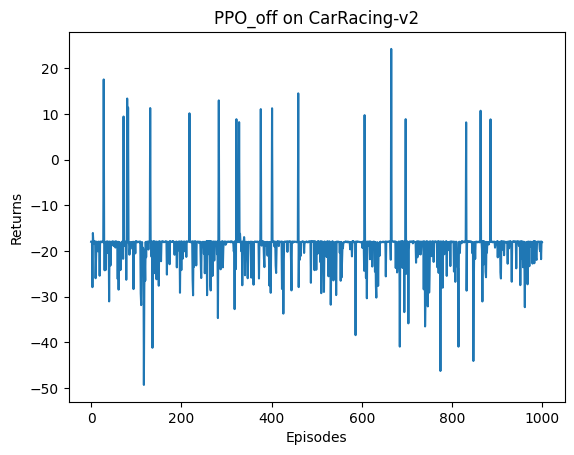

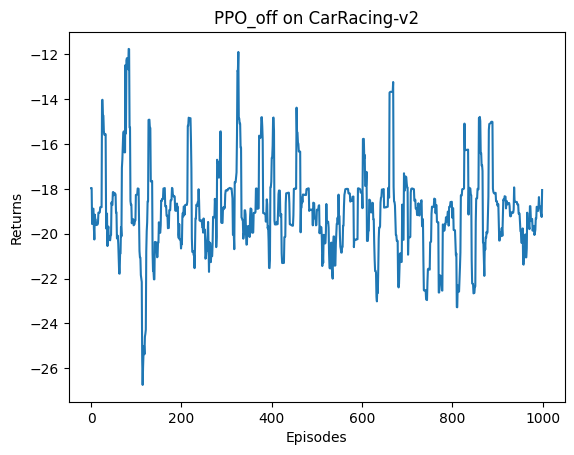

In [5]:
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('PPO_off on {}'.format("CarRacing-v2"))
plt.savefig("figure1.png", dpi=300)
plt.show()

mv_return = moving_average(return_list, 9)
plt.plot(episodes_list, mv_return)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('PPO_off on {}'.format("CarRacing-v2"))
plt.savefig("figure2.png", dpi=300)
plt.show()


In [6]:
actor_lr = 1e-3
critic_lr = 1e-3
num_episodes = 100
hidden_dim = 100
gamma = 0.99
ppo_epoch = 10
eps = 0.1
buffer_capacity = 2000
batch_size = 128
input_channels = 4

env = Env(seed=0, action_repeat=8, img_stack=3, render_mode="human")
torch.manual_seed(0)


agent = PPO_off(input_channel=input_channels, hidden_dim=hidden_dim, gamma=gamma, eps=eps, ppo_epoch=ppo_epoch, buffer_capacity=buffer_capacity, batch_size=batch_size, actor_lr=actor_lr,
                  critic_lr=critic_lr)

# 加载权重
actor_weights_path = './weights/PPO_off_actor_weights.pth'
critic_weights_path = './weights/PPO_off_critic_weights.pth'
agent.load_weights(actor_weights_path, critic_weights_path)

# 播放游戏
play_game(env, agent, episodes=10)

NameError: name 'Env' is not defined